# 1. Machine Deficiency

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Define transition probability matrix
machine_transition_matrix = np.array([
    [0.9, 0.1],  # From Operational
    [0.4, 0.6]   # From Failed
])
print("Machine Transition Matrix:\n", machine_transition_matrix)

Machine Transition Matrix:
 [[0.9 0.1]
 [0.4 0.6]]


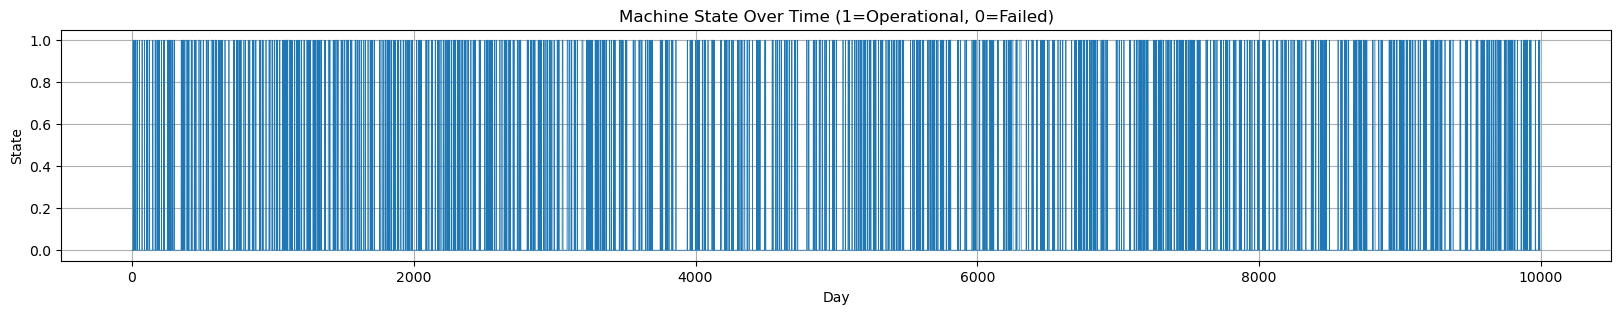

In [25]:
np.random.seed(0)
days = 10000
states = np.zeros(days, dtype=int)  # 0: Operational, 1: Failed
for t in range(1, days):
    current = states[t-1]
    states[t] = np.random.choice([0, 1], p=machine_transition_matrix[current])

# Plotting
plt.figure(figsize=(20, 3))
plt.plot(states, lw=0.5)
plt.title("Machine State Over Time (1=Operational, 0=Failed)")
plt.xlabel("Day")
plt.ylabel("State")
plt.grid(True)
plt.show()

In [26]:
# Discussing results
operational_ratio = np.sum(states) / days
failed_ratio = 1 - operational_ratio
operational_ratio, failed_ratio


(0.1999, 0.8001)

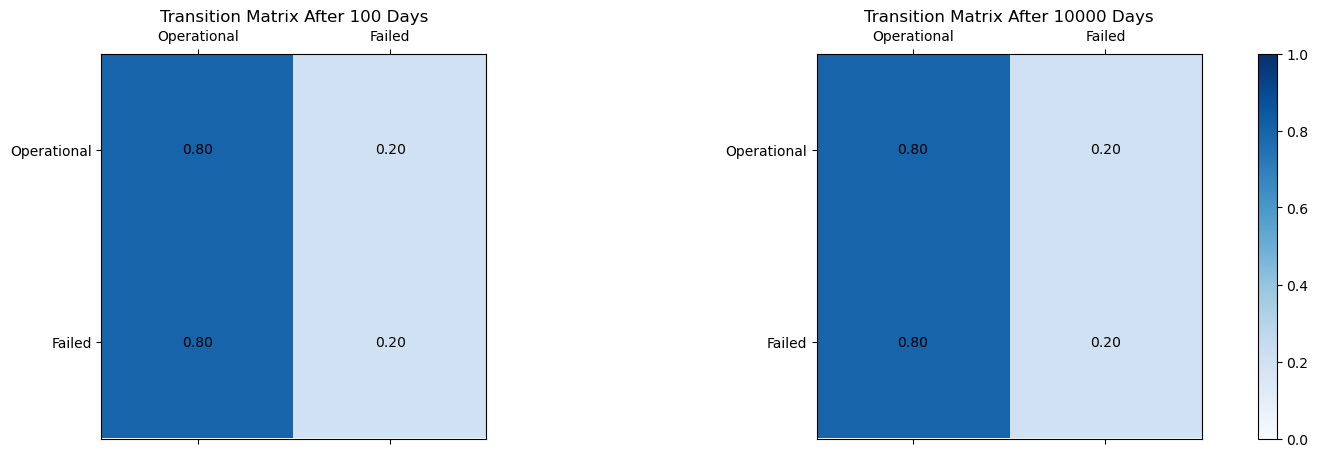

In [27]:
# Define states
states = ['Operational', 'Failed']


P_100 = np.linalg.matrix_power(machine_transition_matrix, 100)
P_10000 = np.linalg.matrix_power(machine_transition_matrix, 10000)

# Convert to DataFrames for better visualization
df_P_100 = pd.DataFrame(P_100, index=states, columns=states)
df_P_10000 = pd.DataFrame(P_10000, index=states, columns=states)


# Plot the transition matrices over different time steps
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

time_steps = [100, 10000]
matrices = [P_100, P_10000]

for i, (ax, P_t, t) in enumerate(zip(axes, matrices, time_steps)):
    cax = ax.matshow(P_t, cmap='Blues', vmin=0, vmax=1)
    ax.set_xticks(range(2))
    ax.set_yticks(range(2))
    ax.set_xticklabels(states)
    ax.set_yticklabels(states)
    ax.set_title(f'Transition Matrix After {t} Days')
    
    for (j, k), val in np.ndenumerate(P_t):
        ax.text(k, j, f"{val:.2f}", ha='center', va='center', color='black')

fig.colorbar(cax, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
plt.show()

##  Discussion of the Results:

- The probability transition does not changed after some iterations, it represent the steady state, equilibrium
- The markov chain converged to Simulated probability

# 2. Brownian Motion

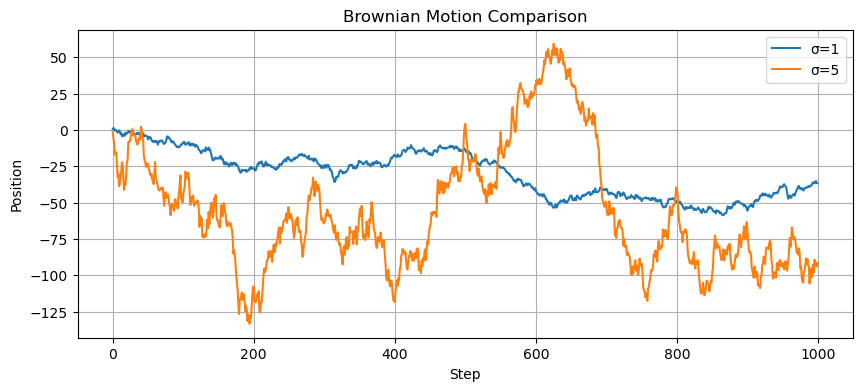

In [28]:
# 2. Brownian motion
steps = 1000
sigma1 = 1
sigma2 = 5
bm1 = np.cumsum(np.random.normal(0, sigma1, steps))
bm2 = np.cumsum(np.random.normal(0, sigma2, steps))

# Plotting both Brownian motions
plt.figure(figsize=(10, 4))
plt.plot(bm1, label='σ=1')
plt.plot(bm2, label='σ=5')
plt.title("Brownian Motion Comparison")
plt.xlabel("Step")
plt.ylabel("Position")
plt.legend()
plt.grid(True)
plt.show()

##  Discussion of the Results:
Effect of Variance (σ):

- The orange curve (σ = 5) exhibits larger fluctuations, meaning the particle moves much more erratically.
- The yellow curve (σ = 1) is much smoother, with smaller movements at each step.
Interpretation of Brownian Motion:
- Higher variance means greater uncertainty in movement.
- When σ is larger, the particle explores a wider range of positions more quickly.


# 3. Disease Progression

In [29]:
# Define the transition probability matrix
P = np.array([[0.6, 0.3, 0.1],
              [0.2, 0.5, 0.3],
              [0.4, 0.5, 0.1]])

print('Transition Matrix::\n', P)

Transition Matrix::
 [[0.6 0.3 0.1]
 [0.2 0.5 0.3]
 [0.4 0.5 0.1]]


________________________________________
Healthy:: 0.422
Mild:: 0.408
Severe:: 0.17
________________________________________


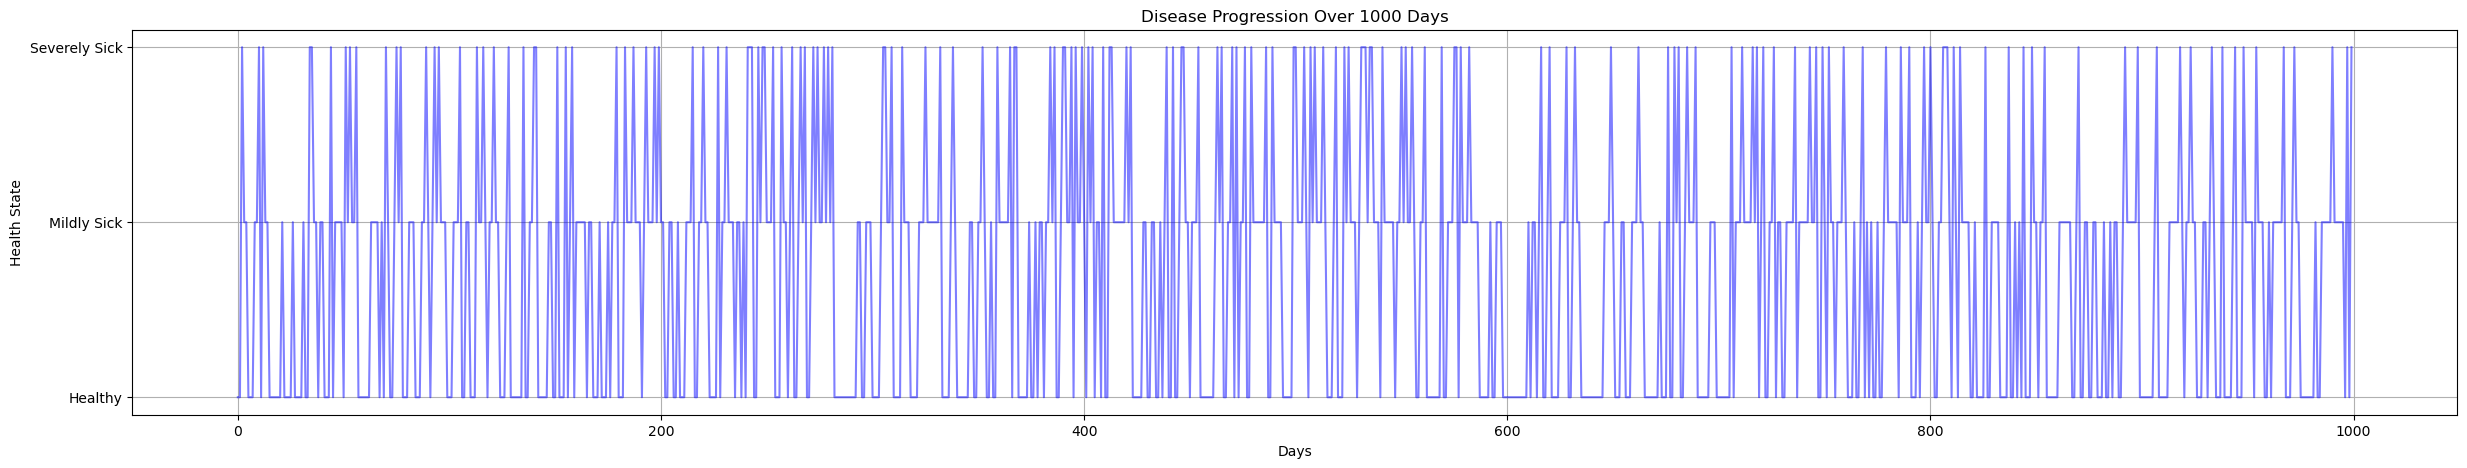

In [30]:
# Define states
states = ['Healthy', 'Mildly Sick', 'Severely Sick']

# Simulate 1000 days
np.random.seed(42)  
num_days = 1000
state_history = np.zeros(num_days, dtype=int)
state_history[0] = 0  # Start from 'Healthy'

for i in range(1, num_days):
    current_state = state_history[i-1]
    next_state = np.random.choice([0, 1, 2], p=P[current_state])
    state_history[i] = next_state


ratio_H = np.sum(state_history == 0) / num_days
ratio_M = np.sum(state_history == 1) / num_days
ratio_C = np.sum(state_history == 2) / num_days

print('_'*40)
print('Healthy::', ratio_H)
print('Mild::', ratio_M)
print('Severe::', ratio_C)
print('_'*40)

# Plot the simulation results
plt.figure(figsize=(30, 5))
plt.plot(state_history, label='Patient Health State', color='blue', alpha=0.5)
plt.yticks([0, 1, 2], states)
plt.xlabel("Days")
plt.ylabel("Health State")
plt.title("Disease Progression Over 1000 Days")
plt.grid(True)
plt.show()


Healthy:: 0.422
Mild:: 0.408
Severe:: 0.17


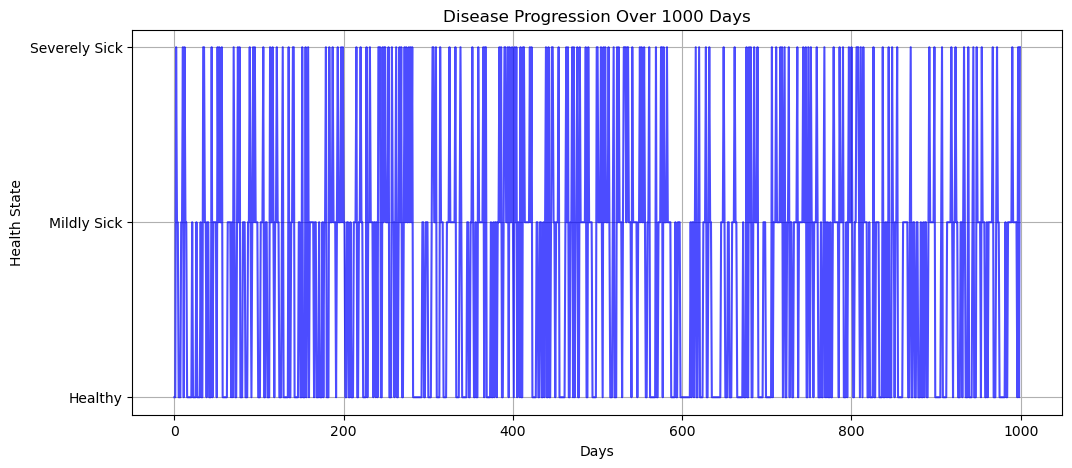

,Healthy,Mildly Sick,Severely Sick
Healthy,0.394737,0.421053,0.184211
Mildly Sick,0.394737,0.421053,0.184211
Severely Sick,0.394737,0.421053,0.184211


In [31]:
# Define states
states = ['Healthy', 'Mildly Sick', 'Severely Sick']

# Simulate the Markov process for 1000 days
np.random.seed(42)  # For reproducibility
num_days = 1000
state_history = np.zeros(num_days, dtype=int)
state_history[0] = 0  # Start from 'Healthy'

for i in range(1, num_days):
    current_state = state_history[i-1]
    next_state = np.random.choice([0, 1, 2], p=P[current_state])
    state_history[i] = next_state


ratio_H = np.sum(state_history == 0) / num_days
ratio_M = np.sum(state_history == 1) / num_days
ratio_C = np.sum(state_history == 2) / num_days

print('Healthy::', ratio_H)
print('Mild::', ratio_M)
print('Severe::', ratio_C)

# Plot the simulation results
plt.figure(figsize=(12, 5))
plt.plot(state_history, label='Patient Health State', color='blue', alpha=0.7)
plt.yticks([0, 1, 2], states)
plt.xlabel("Days")
plt.ylabel("Health State")
plt.title("Disease Progression Over 1000 Days")
plt.grid(True)
plt.show()

# Compute the transition probability matrix after 1000 days
P_1000 = np.linalg.matrix_power(P, 100)

# Display the long-term transition probability matrix
import pandas as pd
df_P_1000 = pd.DataFrame(P_1000, index=states, columns=states)
df_P_1000


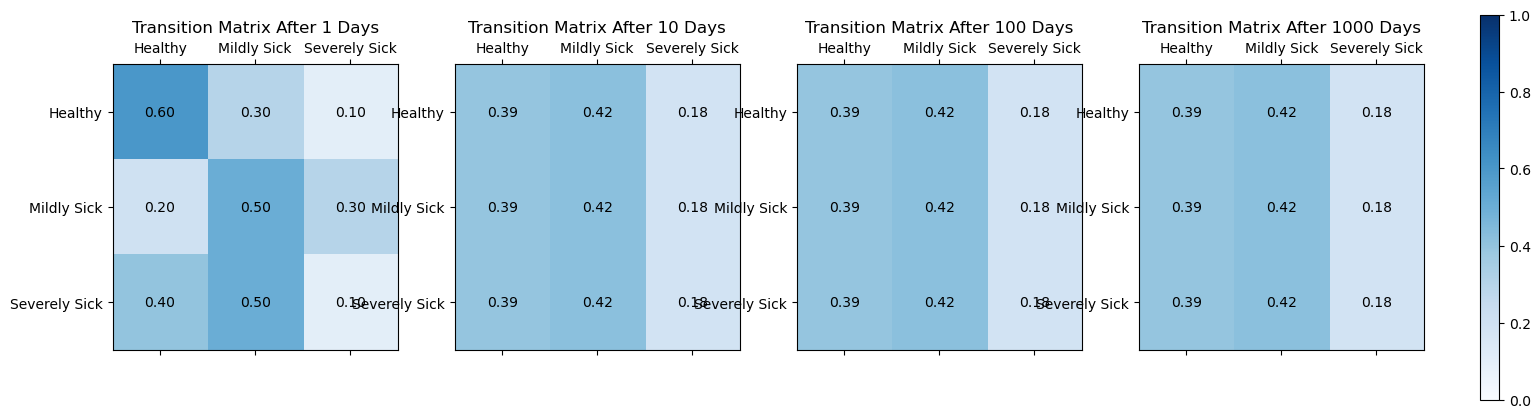

In [32]:
# Define states
states = ['Healthy', 'Mildly Sick', 'Severely Sick']

# Compute transition matrices using Chapman-Kolmogorov equation 
P_10 = np.linalg.matrix_power(P, 10)
P_100 = np.linalg.matrix_power(P, 100)
P_1000 = np.linalg.matrix_power(P, 1000)

# Convert to DataFrames for better visualization
df_P_10 = pd.DataFrame(P_10, index=states, columns=states)
df_P_100 = pd.DataFrame(P_100, index=states, columns=states)
df_P_1000 = pd.DataFrame(P_1000, index=states, columns=states)


# Plot the transition matrices over different time steps
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

time_steps = [1, 10, 100, 1000]
matrices = [P, P_10, P_100, P_1000]

for i, (ax, P_t, t) in enumerate(zip(axes, matrices, time_steps)):
    cax = ax.matshow(P_t, cmap='Blues', vmin=0, vmax=1)
    ax.set_xticks(range(3))
    ax.set_yticks(range(3))
    ax.set_xticklabels(states)
    ax.set_yticklabels(states)
    ax.set_title(f'Transition Matrix After {t} Days')
    
    for (j, k), val in np.ndenumerate(P_t):
        ax.text(k, j, f"{val:.2f}", ha='center', va='center', color='black')

fig.colorbar(cax, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
plt.show()


##  Discussion of the Results:

- After 10 days the markov process stabilized in steady state, the probability transition doesn't change afterwards 
- The markov chain converged to Simulated probability 